In [9]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline


In [10]:
secretNumber = "10001011"

0 is 1
1 is 1
2 is 0
3 is 1
4 is 0
5 is 0
6 is 0
7 is 1


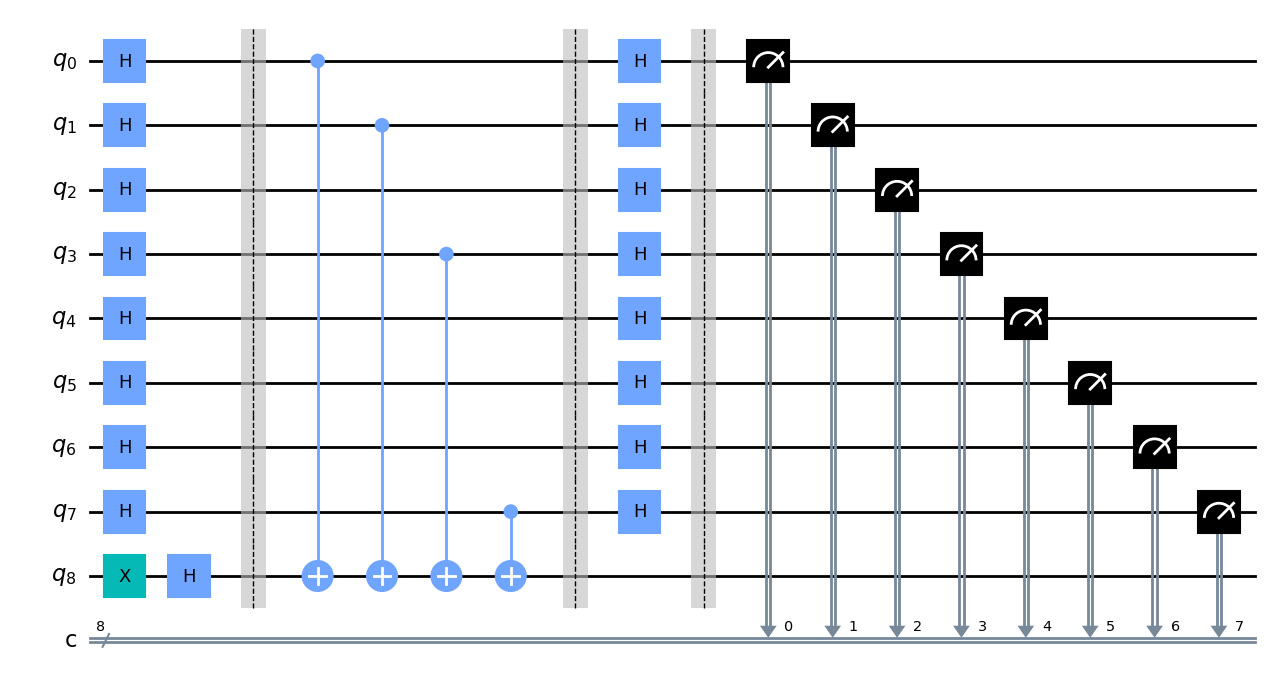

In [11]:
circuit = QuantumCircuit(len(secretNumber) + 1, len(secretNumber))

circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))
circuit.barrier()

for index, one in enumerate(reversed(secretNumber)):
    print(f"{index} is {one}")
    if one =="1":
        circuit.cx(index, len(secretNumber))
circuit.barrier()

circuit.h(range(len(secretNumber)))
circuit.barrier()

circuit.measure(range(len(secretNumber)),range(len(secretNumber)))

circuit.draw(output="mpl")

In [12]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'10001011': 1024}
